Determine front sprocket sizes:

In [67]:
import math
from scipy import optimize
import numpy as np

def circumference(diameter):
    return math.pi * diameter

def teeth_per_mm(circumference, teeth):
    return teeth / circumference

def mm_to_teeth(mm, teeth_per_mm, extra):
    # return mm * teeth_per_mm
    # numpy multiply
    return np.add(np.multiply(mm, teeth_per_mm),extra)

front_gears = [
    [22,90,"F1"],
    [32,129,"F2"],
    [42,167,"F3"]
    ]

rear_gears = [
    [12,56,"R7"],
    [14,61,"R6"],
    [16,67,"R5"],
    [18,75,"R4"],
    [21,85,"R3"],
    [24,95,"R2"],
    [28,108,"R1"],
    ]

import matplotlib.pyplot as plt
y_data = [x[0] for x in front_gears]
x_data = [int(round(circumference(x[1]))) for x in front_gears]
print(y_data)

y_data_rear = [x[0] for x in rear_gears]
x_data_rear = [int(round(circumference(x[1]))) for x in rear_gears]
print(y_data_rear)

params, params_covariance = optimize.curve_fit(mm_to_teeth, x_data, y_data,
                                               p0=[2,2])
params_rear, params_covariance_rear = optimize.curve_fit(mm_to_teeth, x_data_rear, y_data_rear,
                                               p0=[2,2])

print(params)
print(params_rear)

[22, 32, 42]
[12, 14, 16, 18, 21, 24, 28]
[ 0.08264275 -1.41521717]
[ 0.09603063 -4.56866133]


Plot values of front size curve:

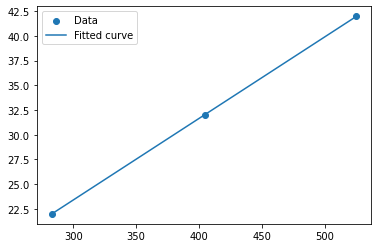

In [68]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, mm_to_teeth(x_data, params[0], params[1]),
         label='Fitted curve')

plt.legend(loc='best')

plt.show()

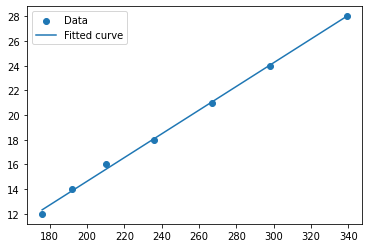

In [69]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data_rear, y_data_rear, label='Data')
plt.plot(x_data_rear, mm_to_teeth(x_data_rear, params_rear[0], params_rear[1]),
         label='Fitted curve')

plt.legend(loc='best')

plt.show()

Calculate more gears

In [70]:
print(
    "Largest gear:", mm_to_teeth(circumference(167), params[0], params[1]),
    )
print(
    "Medium gear:", mm_to_teeth(circumference(129), params[0], params[1]),
)
print(
    "Smallest gear:", mm_to_teeth(circumference(90), params[0], params[1]),
)
print(
    "R7:", mm_to_teeth(circumference(56), params_rear[0], params_rear[1]),
)
print(
    "R6:", mm_to_teeth(circumference(61), params_rear[0], params_rear[1]),
)
print(
    "R5:", mm_to_teeth(circumference(67), params_rear[0], params_rear[1]),
)
print(
    "R4:", mm_to_teeth(circumference(75), params_rear[0], params_rear[1]),
)
print(
    "R3:", mm_to_teeth(circumference(85), params_rear[0], params_rear[1]),
)
print(
    "R2:", mm_to_teeth(circumference(95), params_rear[0], params_rear[1]),
)
print(
    "R1:", mm_to_teeth(circumference(108), params_rear[0], params_rear[1]),
)
print(
    "Big big big (1m radius):", mm_to_teeth(circumference(1000), params[0], params[1]),
)

from pprint import *
pprint(
    rear_gears
)
pprint(front_gears)

Largest gear: 41.94296699464405
Medium gear: 32.07703287408577
Smallest gear: 21.95146890824966
R7: 12.325930201109873
R6: 13.83437587310382
R5: 15.644510679496555
R4: 18.05802375468687
R3: 21.074915098674765
R2: 24.09180644266266
R1: 28.013765189846918
Big big big (1m radius): 258.21462811109245
[[12, 56, 'R7'],
 [14, 61, 'R6'],
 [16, 67, 'R5'],
 [18, 75, 'R4'],
 [21, 85, 'R3'],
 [24, 95, 'R2'],
 [28, 108, 'R1']]
[[22, 90, 'F1'], [32, 129, 'F2'], [42, 167, 'F3']]


In [77]:
import fractions
for gear in sorted(front_gears,key = lambda x: x[2]):
    # ratio = gear[0] over gear[1] simplified
    ratio = fractions.Fraction(gear[0], gear[1])
    print(gear[2],ratio)
for gear in sorted(rear_gears,key = lambda x: x[2]):
    ratio = fractions.Fraction(gear[0], gear[1])
    print(gear[2],ratio)

F1 11/45
F2 32/129
F3 42/167
R1 7/27
R2 24/95
R3 21/85
R4 6/25
R5 16/67
R6 14/61
R7 3/14
